In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist

# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reshape the data to fit the MLP input requirements
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

In [3]:
# Build the MLP model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2631 - accuracy: 0.9231 - val_loss: 0.1402 - val_accuracy: 0.9572
Epoch 2/10
1500/1500 [==============================] - 44s 30ms/step - loss: 0.1102 - accuracy: 0.9669 - val_loss: 0.1018 - val_accuracy: 0.9702
Epoch 3/10
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0756 - accuracy: 0.9772 - val_loss: 0.0951 - val_accuracy: 0.9722
Epoch 4/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0567 - accuracy: 0.9818 - val_loss: 0.0936 - val_accuracy: 0.9735
Epoch 5/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0445 - accuracy: 0.9860 - val_loss: 0.0894 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0980 - val_accuracy: 0.9737
Epoch 7/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0.1030 -

In [5]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 10s 30ms/step - loss: 0.1112 - accuracy: 0.9752
Test accuracy: 0.9752


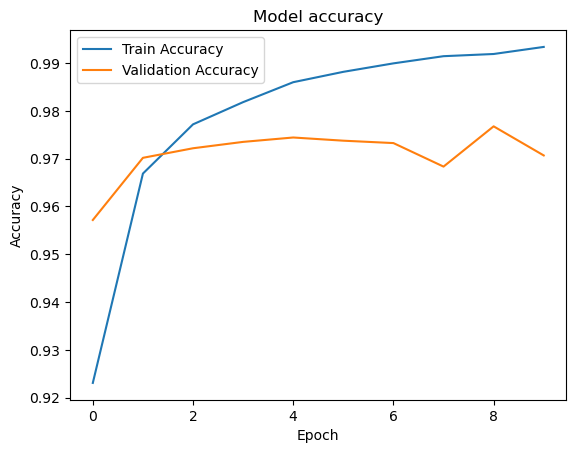

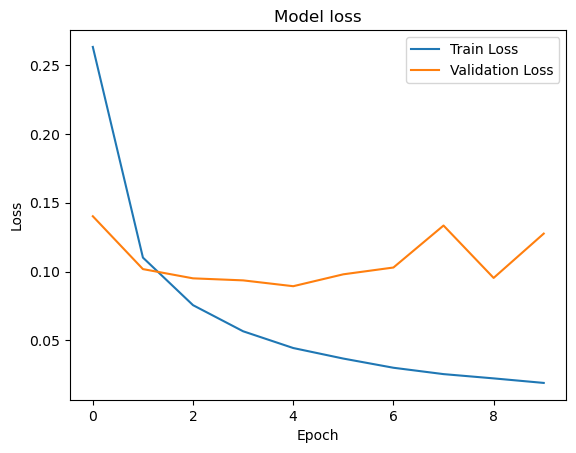

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

313/313 [==============================] - 6s 20ms/step


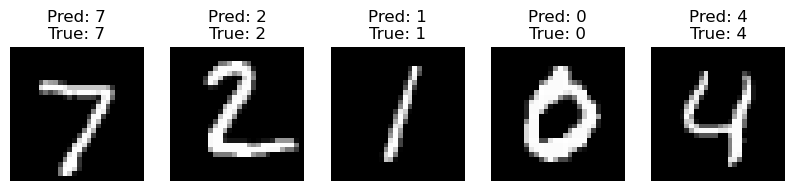

In [7]:
# Make predictions on test data
predictions = model.predict(x_test)

# Display some predictions
def plot_predictions(predictions, labels, images, num=5):
    plt.figure(figsize=(10, 4))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {labels[i]}")
        plt.axis('off')
    plt.show()

plot_predictions(predictions, y_test, x_test)